# **Object Detection - Models Testing - YOLO**

---

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
%matplotlib inline

In [3]:
yolo = YOLO("../..//runs/detect/train/weights/best.pt")
results = yolo.val(data="../../data/dataset.yaml", split="test", save=True)

Ultralytics 8.3.133  Python-3.12.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 898.2862.2 MB/s, size: 335.9 KB)


val: Scanning C:\Users\mateu\Downloads\UA\Cadeiras\Seminário\Object_Detection\data\split_data\labels\test.cache... 1092 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1092/1092 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:10<00:00,  6.34it/s]


                   all       1092       8644      0.979      0.966      0.987       0.83
                  blue        901       1802      0.981      0.951      0.967      0.838
                 green        883       1766      0.987      0.934      0.989      0.842
                orange        867       1734      0.986      0.979      0.994      0.832
                   red        770       1540      0.965      0.984      0.992      0.834
                yellow        901       1802      0.974      0.984      0.994      0.804
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to C:\Users\mateu\Downloads\UA\Cadeiras\Seminrio\Object_Detection\runs\detect\val


In [4]:
test_image_path = "../../data/split_data/images/test/frame_0_aug_0.jpg"
results = yolo(test_image_path, conf=0.5)[0]
print("Results:")
print(results)


image 1/1 c:\Users\mateu\Downloads\UA\Cadeiras\Seminrio\Object_Detection\models\notebooks\..\..\data\split_data\images\test\frame_0_aug_0.jpg: 480x640 2 blues, 2 greens, 2 oranges, 2 reds, 2 yellows, 61.6ms
Speed: 2.1ms preprocess, 61.6ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)
Results:
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'blue', 1: 'green', 2: 'orange', 3: 'red', 4: 'yellow'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
       

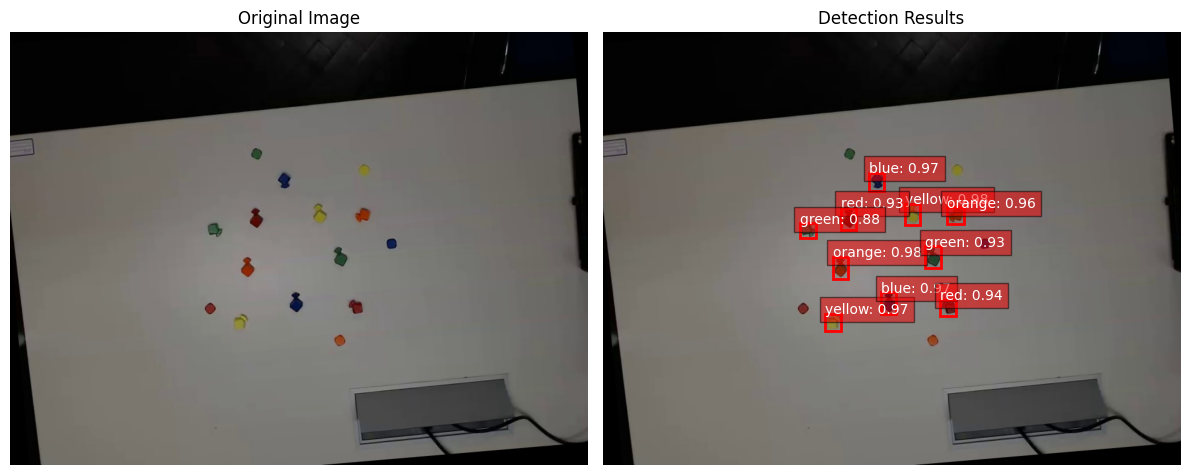

In [5]:
img = mpimg.imread(test_image_path)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show image with detection results
axs[1].imshow(img)
for box, cls, conf in zip(results.boxes.xyxy.cpu().numpy(), results.boxes.cls.cpu().numpy(), results.boxes.conf.cpu().numpy()):
    x1, y1, x2, y2 = box
    axs[1].add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2))
    label = f"{results.names[int(cls)]}: {conf:.2f}"
    axs[1].text(x1, y1, label, color='white', fontsize=10, bbox=dict(facecolor='red', alpha=0.5))
axs[1].set_title("Detection Results")
axs[1].axis('off')

plt.tight_layout()
plt.show()